In [35]:
from transformers import pipeline
import pandas as pd

In [36]:
trained_model = "bhadresh-savani/distilbert-base-uncased-emotion"

sentiment_pipeline_default = pipeline("sentiment-analysis", truncation=True, max_length=512)
sentiment_pipeline_emotions = pipeline("sentiment-analysis", model=trained_model, truncation=True, max_length=512)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [37]:
data1 = pd.read_parquet("../data/sample_data.parquet", columns=["Message-ID", "body"])
data2 = pd.read_parquet("../data/sample_data_v2.parquet", columns=["Message-ID", "body"])

data = pd.concat([data1, data2]).drop_duplicates().reset_index(drop=True)

In [27]:
data["body"][300]

"\n\t[IMAGE]  \t\n\tHey, Phillip - it's trivia time!   Think you know TV? Take the iWon TV Trivia Challenge - once you've answered the question, you'll be eligible to win the Ultimate Home Theatre System valued at over $7,886 (Nothing trivial about that!)  \t\n\t[IMAGE]  \t\n[IMAGE]   [IMAGE]   [IMAGE]   [IMAGE] \t[IMAGE] \t\n\tGood luck! - The iWon Team \t\n\t[IMAGE]  \t\n\t[IMAGE] \t\n\t No Purchase Necessary For Sweepstakes Subject To Official Rules  Forgot your member name? It is: PALLEN70  Forgot your iWon password? Click here.    You received this email because when you registered at iWon you agreed to receive email from us. To unsubscribe from one or more email categories, please click below. Please note, changes may take up to one week to process. If you're not signed in, you will need to do so before you can update your profile. Click here.   [IMAGE]\t\n"

In [30]:
sentiment_pipeline_emotions(data["body"][300])

[{'label': 'joy', 'score': 0.5841578841209412}]

In [38]:
res_default = data['body'].apply(sentiment_pipeline_default)

In [49]:
res_emotions = data.loc[:4000, 'body'].apply(sentiment_pipeline_emotions)

KeyboardInterrupt: 

In [ ]:
a = data.join(res_default)
b = data.join(res_emotions)

In [45]:
res_default_1 = res_default.apply(lambda x: x[0]['label'])
res_emotions_1 = res_emotions.apply(lambda x: x[0]['label'])

In [46]:
import seaborn as sns

<AxesSubplot: xlabel='body', ylabel='Count'>

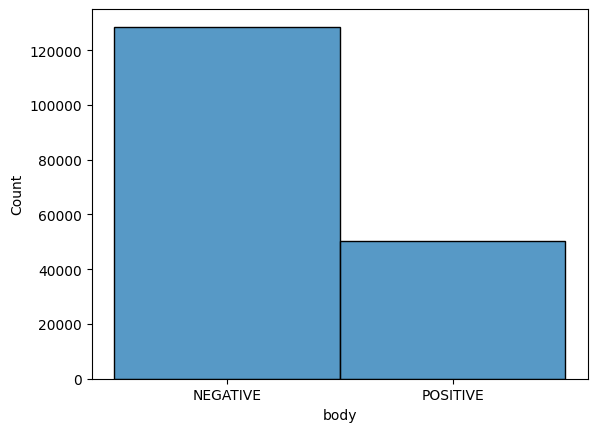

In [47]:
sns.histplot(res_default_1)

<AxesSubplot: xlabel='body', ylabel='Count'>

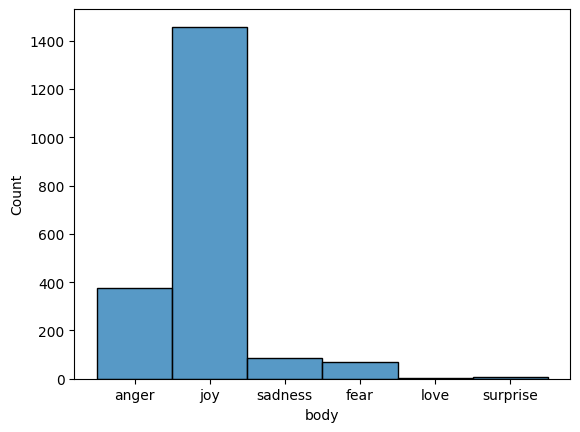

In [48]:
sns.histplot(res_emotions_1)

In [19]:
import json

# Save manifest (needed by OVHcloud ML Serving to load your pipeline)
with open(path_to_save + '/manifest.json', 'w') as file:
    json.dump({
        'type': 'huggingface_pipeline',
        'pipeline_class': type(sentiment_pipeline).__name__,
        'tokenizer_class': type(sentiment_pipeline.tokenizer).__name__,
        'model_class': type(sentiment_pipeline.model).__name__,
    }, file, indent=2)